# Code to generate all figures on ar events used in the paper


In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# setup all the imports
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import seaborn as sns
from extremeweatherbench import evaluate, calc, cases, defaults, inputs, metrics, regions, derived
sns.set_theme(style='whitegrid')
import shapely
from pathlib import Path
import multiprocessing
import xarray as xr
from matplotlib.lines import Line2D

# make the basepath - change this to your local path
basepath = Path.home() / "extreme-weather-bench-paper" / ""
basepath = str(basepath) + "/"

import src.plots.paper_plotting as pp  # noqa: E402


In [7]:
# make a global color palatte so things are consistent across plots
sns_palette = sns.color_palette("tab10")
sns.set_style("whitegrid")

accessible_colors = [
    "#3394D6",  # blue
    "#E09000",  #  orange "#E69F00",  # orange
    "#A15A7E",  # "#CC79A7",  # reddish purple
    "#CC4A4A",  #  vermillion"#D55E00",  # vermillion
    "#A0A0A0",  # Grey "#000000",  # black
    "#B2B24D",  # Olive
    "#33B890",  # bluish green
    "#78C6F1",  # sky blue
    "#F0E442",  # yellow
]

# defaults for plotting
fourv2_style = {'color': accessible_colors[0]}
gc_style = {'color': accessible_colors[2]}
pangu_style = {'color': accessible_colors[3]}
hres_style = {'color': 'black'}

# the group styles and settings so that we can just easily grab them for the plots and they are globally consistent

era5_group_style = {'linestyle':'--', 'marker':'s', 'group':'ERA5'}
gfs_group_style = {'linestyle':':', 'marker':'d', 'group':'GFS'}
global_group_style = {'linestyle':'--', 'marker':'*', 'group':'Global'}
hres_group_style = {'linestyle':'-', 'marker':'.', 'group':'HRES'}

# settings for the different models
fourv2_gfs_cira_settings = {'forecast_source':'CIRA FOURv2 GFS', 'label_str': 'ForecastNet V2'} 
gc_gfs_cira_settings = {'forecast_source':'CIRA GC GFS', 'label_str': 'GraphCast'} 
pangu_gfs_cira_settings = {'forecast_source':'CIRA PANG GFS', 'label_str': 'Pangu Weather'} 

hres_ifs_settings = {'forecast_source':'ECMWF HRES', 'label_str': 'HRES'} 



In [4]:
# load in all of the events in the yaml file
print("loading in the events yaml file")
ewb_cases = cases.load_ewb_events_yaml_into_case_collection()
# build out all of the expected data to evalate the case
# this will not be a 1-1 mapping with ewb_cases because there are multiple data sources
# to evaluate for some cases
# for example, a heat/cold case will have both a case operator for ERA-5 data and GHCN
case_operators = cases.build_case_operators(
    ewb_cases, defaults.get_brightband_evaluation_objects()
)


loading in the events yaml file


# load results from the pickles

In [8]:
# load the results back in
fourv2_ar_results = pd.read_pickle(basepath + 'saved_data/fourv2_ar_results.pkl')
pang_ar_results = pd.read_pickle(basepath + 'saved_data/pang_ar_results.pkl')
hres_ar_results = pd.read_pickle(basepath + 'saved_data/hres_ar_results.pkl')
gc_ar_results = pd.read_pickle(basepath + 'saved_data/gc_ar_results.pkl')


In [9]:
hres_ar_results['metric'].unique()

array(['CriticalSuccessIndex', 'spatial_displacement', 'EarlySignal'],
      dtype=object)

In [10]:
hres_ar_results['target_source'].unique()

array(['ERA5'], dtype=object)

In [11]:
hres_ar_results['value'].value_counts()

value
0.0          28029
True          8098
27.798732        5
27.798732        4
14.628071        3
             ...  
0.047051         1
0.11585          1
0.095381         1
0.129726         1
0.212532         1
Name: count, Length: 2657, dtype: int64

# plotting and subsetting code at the global level

In [12]:
fourv2_gfs_era5_settings_csi = fourv2_gfs_cira_settings | fourv2_style | era5_group_style   
gc_gfs_era5_settings_csi  = gc_gfs_cira_settings | gc_style | era5_group_style
pangu_gfs_era5_settings_csi = pangu_gfs_cira_settings | pangu_style | era5_group_style
hres_era5_settings_csi = hres_ifs_settings | hres_style | hres_group_style

# grab the severe results
fourv2_ar_plot_csi = pp.subset_results_to_xarray(results_df=fourv2_ar_results, 
    forecast_source=fourv2_gfs_cira_settings['forecast_source'], 
    target_source='ERA5', metric='CriticalSuccessIndex', init_time='zeroz')
gc_ar_plot_csi = pp.subset_results_to_xarray(results_df=gc_ar_results, 
    forecast_source=gc_gfs_cira_settings['forecast_source'], 
    target_source='ERA5', metric='CriticalSuccessIndex', init_time='zeroz')
pangu_ar_plot_csi  = pp.subset_results_to_xarray(results_df=pang_ar_results, 
    forecast_source=pangu_gfs_cira_settings['forecast_source'], 
    target_source='ERA5', metric='CriticalSuccessIndex', init_time='zeroz')
hres_ar_plot_csi = pp.subset_results_to_xarray(results_df=hres_ar_results, 
    forecast_source=hres_era5_settings_csi['forecast_source'], 
    target_source='ERA5', metric='CriticalSuccessIndex', init_time='zeroz')

# plot the results
ar_data_csi = [fourv2_ar_plot_csi, gc_ar_plot_csi, pangu_ar_plot_csi, hres_ar_plot_csi]
ar_settings_csi = [fourv2_gfs_era5_settings_csi, gc_gfs_era5_settings_csi, pangu_gfs_era5_settings_csi, hres_era5_settings_csi]
print(fourv2_gfs_cira_settings)




{'forecast_source': 'CIRA FOURv2 GFS', 'label_str': 'ForecastNet V2'}


In [41]:
hres_ar_plot_csi

<xarray.Dataset> Size: 24kB
Dimensions:          (lead_time: 11, case_id_number: 39)
Coordinates:
  * lead_time        (lead_time) timedelta64[ns] 88B 0 days 1 days ... 10 days
  * case_id_number   (case_id_number) int64 312B 114 115 116 117 ... 150 151 152
Data variables:
    value            (lead_time, case_id_number) object 3kB 0.373786407766990...
    init_time        (lead_time, case_id_number) object 3kB nan nan ... nan nan
    target_variable  (lead_time, case_id_number) object 3kB 'atmospheric_rive...
    metric           (lead_time, case_id_number) object 3kB 'CriticalSuccessI...
    forecast_source  (lead_time, case_id_number) object 3kB 'ECMWF HRES' ... ...
    target_source    (lead_time, case_id_number) object 3kB 'ERA5' ... 'ERA5'
    event_type       (lead_time, case_id_number) object 3kB 'atmospheric_rive...

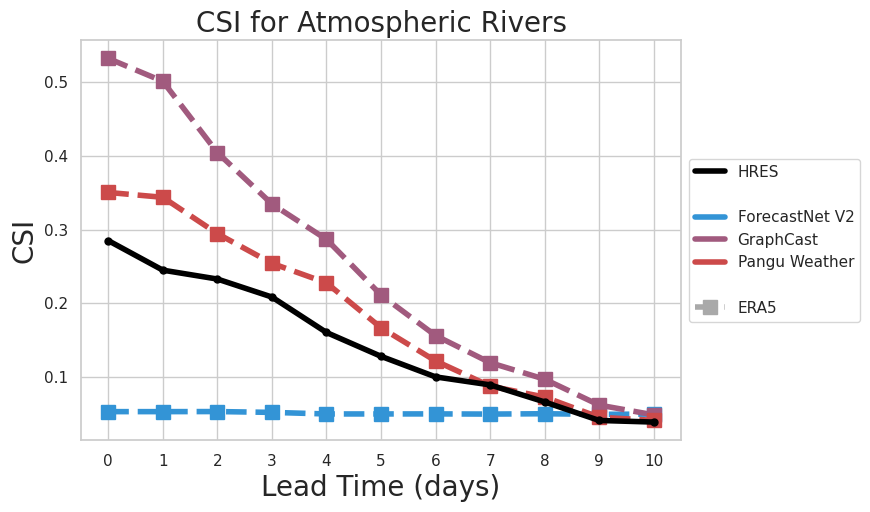

In [13]:
pp.plot_results_by_metric(data=ar_data_csi, settings=ar_settings_csi, 
    title='CSI for Atmospheric Rivers', show_all_in_legend=False, y_label='CSI')
# pp.plot_results_by_metric(data=severe_data_fn, settings=severe_settings_fn, 
#     title='False Negatives Local Storm Reports', show_all_in_legend=False)
# pp.plot_two_results_by_metric(data1=severe_data_tp, data2=severe_data_fn, 
#     settings1=severe_settings_tp, settings2=severe_settings_fn, 
#     y_label1='True Positives', y_label2='False Negatives',
#     title='Local Storm Reports', show_all_in_legend=False)


# analysis at the regional level

North America Cases: [1, 2, 3, 4, 5, 6, 27, 30, 31, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 86, 89, 90, 91, 97, 98, 99, 103, 104, 105, 106, 107, 108, 111, 112, 113, 114, 115, 116, 117, 120, 121, 123, 126, 128, 129, 130, 131, 132, 133, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 172, 174, 175, 176, 177, 178, 179, 180, 181, 182, 196, 197, 198, 199, 200, 201, 202, 203, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339]
Aust

/home/amy/extreme-weather-bench-paper/src/plots/paper_plotting.py:682: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower left", fontsize=12)


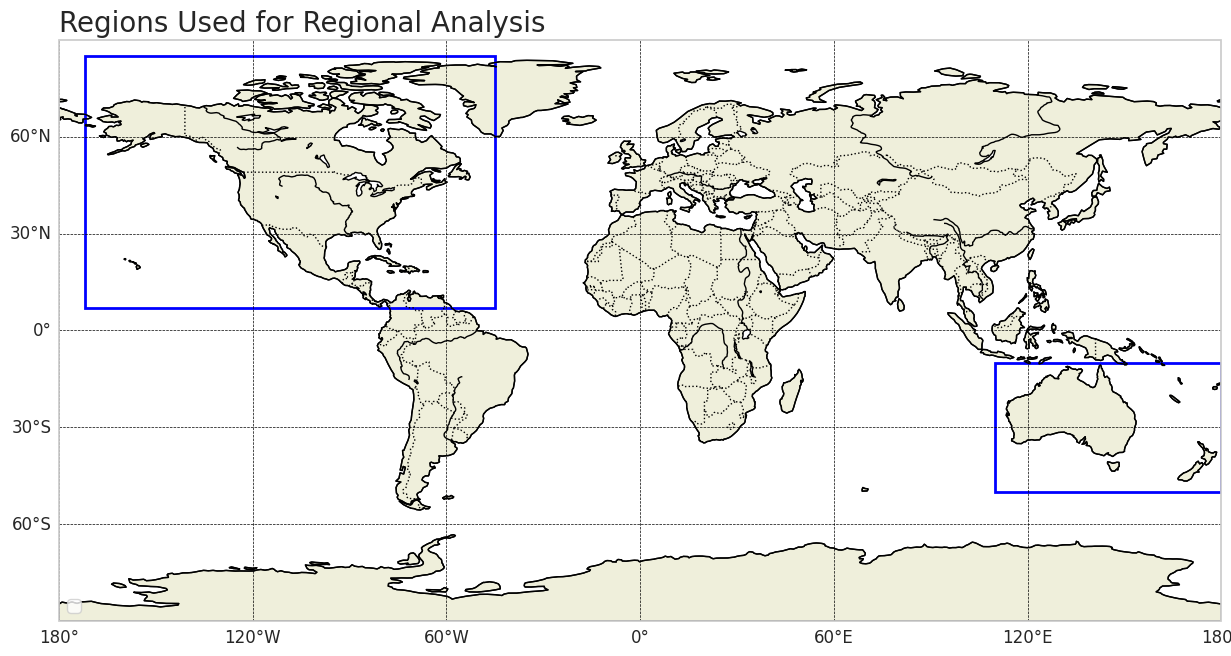

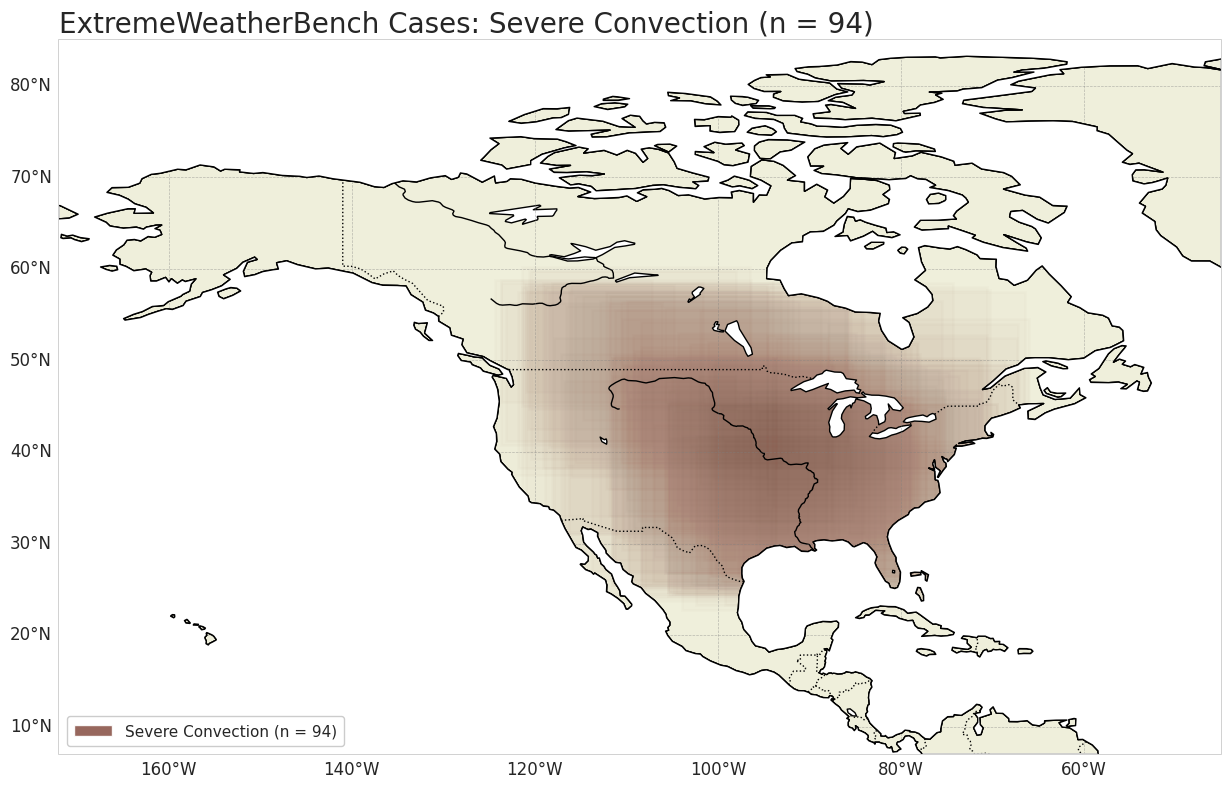

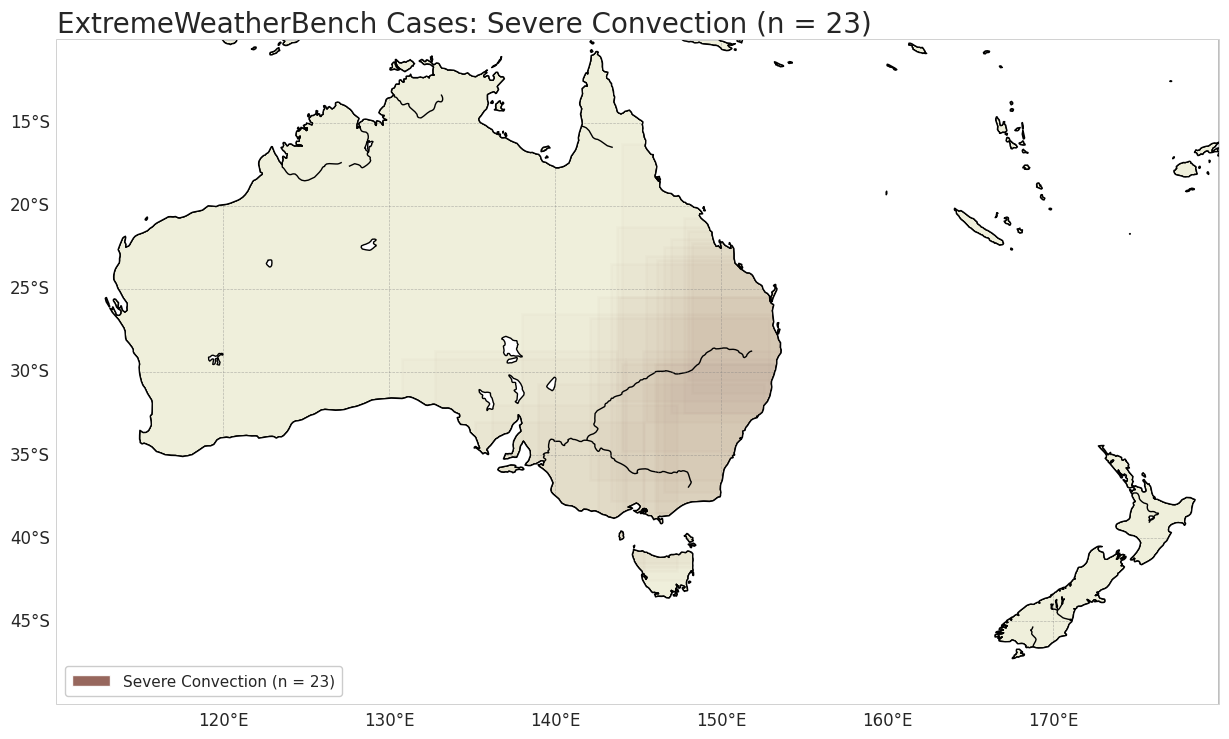

In [18]:
# make the bounding boxes for the regions

# North America
na_bounding_box = [-172, -45, 7, 85]
na_bounding_box_polygon = pp.get_polygon_from_bounding_box(na_bounding_box)
na_bounding_region = regions.BoundingBoxRegion(latitude_min=7, latitude_max=85, longitude_min=-172, longitude_max=-45)

# australia bounding box
au_bounding_box = [110, 180, -50, -10]
au_bounding_box_polygon = pp.get_polygon_from_bounding_box(au_bounding_box)
au_bounding_region = regions.BoundingBoxRegion(latitude_min=-50, latitude_max=-10, longitude_min=110, longitude_max=180)

# break the cases into different lists
na_subset = regions.RegionSubsetter(region=na_bounding_region, method='intersects').subset_case_collection(ewb_cases)
au_subset = regions.RegionSubsetter(region=au_bounding_region, method='intersects').subset_case_collection(ewb_cases)

na_case_ids = [n.case_id_number for n in na_subset.cases]
au_case_ids = [n.case_id_number for n in au_subset.cases]

print(f'North America Cases: {na_case_ids}')
print(f'Australia Cases: {au_case_ids}')

# plot the regions
pp.plot_boxes(
    box_list=[na_bounding_box_polygon, au_bounding_box_polygon],
    box_names=['North America', 'Europe', 'Australia'],
    title='Regions Used for Regional Analysis',
)

# plot North America cases
pp.plot_all_cases(ewb_cases, event_type='severe_convection', bounding_box=na_bounding_box, 
    fill_boxes=True)

pp.plot_all_cases(ewb_cases, event_type='severe_convection', bounding_box=au_bounding_box, 
    fill_boxes=True)

/home/amy/extreme-weather-bench-paper/.venv/lib/python3.13/site-packages/xarray/computation/nanops.py:116: RuntimeWarning: invalid value encountered in divide
  data = data / (valid_count - ddof)
/home/amy/extreme-weather-bench-paper/.venv/lib/python3.13/site-packages/xarray/computation/nanops.py:116: RuntimeWarning: invalid value encountered in divide
  data = data / (valid_count - ddof)
/home/amy/extreme-weather-bench-paper/.venv/lib/python3.13/site-packages/xarray/computation/nanops.py:116: RuntimeWarning: invalid value encountered in divide
  data = data / (valid_count - ddof)
/home/amy/extreme-weather-bench-paper/.venv/lib/python3.13/site-packages/xarray/computation/nanops.py:116: RuntimeWarning: invalid value encountered in divide
  data = data / (valid_count - ddof)


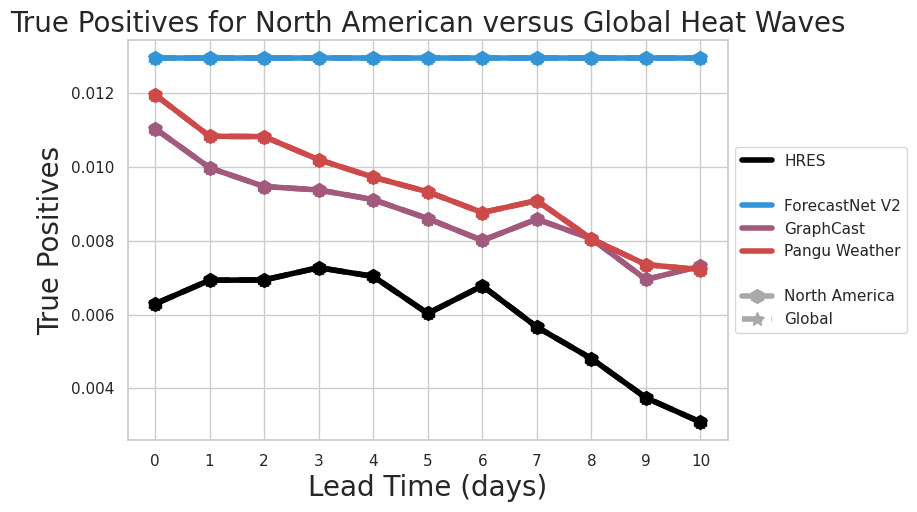

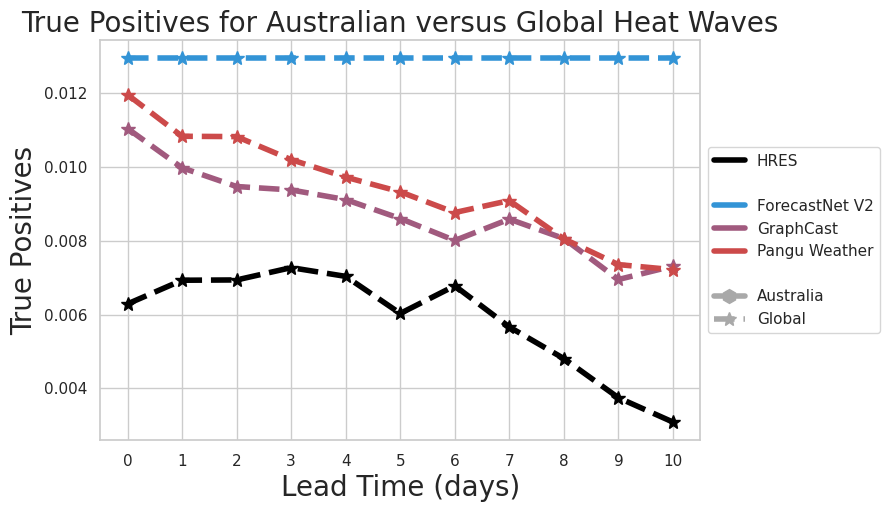

In [19]:
# create a group style for the local/global plots
na_group_style = {'linestyle':'-', 'marker':'h', 'group':'North America'}
au_group_style = {'linestyle':'-', 'marker':'h', 'group':'Australia'}

# plot the results for one metric for the three AI models versus HRES
na_fourv2_gfs_settings = fourv2_gfs_cira_settings | fourv2_style | na_group_style
na_gc_gfs_settings = gc_gfs_cira_settings | gc_style | na_group_style
na_pangu_gfs_settings = pangu_gfs_cira_settings | pangu_style | na_group_style
na_hres_settings = hres_ifs_settings | hres_style | na_group_style

au_fourv2_gfs_settings = fourv2_gfs_cira_settings | fourv2_style | au_group_style
au_gc_gfs_settings = gc_gfs_cira_settings | gc_style | au_group_style
au_pangu_gfs_settings = pangu_gfs_cira_settings | pangu_style | au_group_style
au_hres_settings = hres_ifs_settings | hres_style | au_group_style

# subset the data for the plots
na_fourv2_severe_plot_tp = pp.subset_results_to_xarray(results_df=fourv2_severe_results, 
    forecast_source=fourv2_gfs_cira_settings['forecast_source'], 
    target_source='local_storm_reports', metric='TruePositives', init_time='zeroz',
    case_id_list=na_case_ids)
na_gc_severe_plot_tp = pp.subset_results_to_xarray(results_df=gc_severe_results, 
    forecast_source=gc_gfs_cira_settings['forecast_source'], 
    target_source='local_storm_reports', metric='TruePositives', init_time='zeroz',
    case_id_list=na_case_ids)
na_pangu_severe_plot_tp  = pp.subset_results_to_xarray(results_df=pang_severe_results, 
    forecast_source=pangu_gfs_cira_settings['forecast_source'], 
    target_source='local_storm_reports', metric='TruePositives', init_time='zeroz',
    case_id_list=na_case_ids)
na_hres_severe_plot_tp = pp.subset_results_to_xarray(results_df=hres_severe_results, 
    forecast_source=hres_ifs_settings['forecast_source'], 
    target_source='local_storm_reports', metric='TruePositives', init_time='zeroz',
    case_id_list=na_case_ids)

# subset the data for the plots
au_fourv2_severe_plot_tp = pp.subset_results_to_xarray(results_df=fourv2_severe_results, 
    forecast_source=fourv2_gfs_cira_settings['forecast_source'], 
    target_source='local_storm_reports', metric='TruePositives', init_time='zeroz',
    case_id_list=au_case_ids)
au_gc_severe_plot_tp = pp.subset_results_to_xarray(results_df=gc_severe_results, 
    forecast_source=gc_gfs_cira_settings['forecast_source'], 
    target_source='local_storm_reports', metric='TruePositives', init_time='zeroz',
    case_id_list=au_case_ids)
au_pangu_severe_plot_tp  = pp.subset_results_to_xarray(results_df=pang_severe_results, 
    forecast_source=pangu_gfs_cira_settings['forecast_source'], 
    target_source='local_storm_reports', metric='TruePositives', init_time='zeroz',
    case_id_list=au_case_ids)
au_hres_severe_plot_tp = pp.subset_results_to_xarray(results_df=hres_severe_results, 
    forecast_source=hres_ifs_settings['forecast_source'], 
    target_source='local_storm_reports', metric='TruePositives', init_time='zeroz',
    case_id_list=au_case_ids)

# make a global settings so we can compare
fourv2_global_settings = fourv2_gfs_cira_settings | fourv2_style | global_group_style
pangu_global_settings = pangu_gfs_cira_settings | pangu_style | global_group_style
gc_global_settings = gc_gfs_cira_settings | gc_style | global_group_style
hres_global_settings = hres_ifs_settings | hres_style | global_group_style 

# plot the results
na_data = [na_fourv2_severe_plot_tp, fourv2_severe_plot_tp, na_gc_severe_plot_tp, 
    gc_severe_plot_tp, na_pangu_severe_plot_tp, pangu_severe_plot_tp, na_hres_severe_plot_tp, hres_severe_plot_tp]
settings = [na_fourv2_gfs_settings, fourv2_global_settings, na_gc_gfs_settings, gc_global_settings, 
    na_pangu_gfs_settings, pangu_global_settings, na_hres_settings, hres_global_settings]
pp.plot_results_by_metric(data=na_data, settings=settings, 
    title='True Positives for North American versus Global Heat Waves', y_label='True Positives')

au_data = [au_fourv2_severe_plot_tp, fourv2_severe_plot_tp, au_gc_severe_plot_tp, gc_severe_plot_tp, 
    au_pangu_severe_plot_tp, pangu_severe_plot_tp, au_hres_severe_plot_tp, hres_severe_plot_tp]
settings = [au_fourv2_gfs_settings, fourv2_global_settings, au_gc_gfs_settings, gc_global_settings, 
    au_pangu_gfs_settings, pangu_global_settings, au_hres_settings, hres_global_settings]
pp.plot_results_by_metric(data=au_data, settings=settings, 
    title='True Positives for Australian versus Global Heat Waves', y_label='True Positives')



In [20]:
na_gc_severe_plot_tp["value"].mean("case_id_number")


<xarray.DataArray 'value' (lead_time: 11)> Size: 88B
array([0.01104471, 0.00997993, 0.00947174, 0.009379  , 0.00911659,
       0.00860354, 0.00800781, 0.00858706, 0.00806031, 0.00695028,
       0.00731283])
Coordinates:
  * lead_time  (lead_time) timedelta64[ns] 88B 0 days 1 days ... 9 days 10 days

In [21]:
au_gc_severe_plot_tp["value"]

<xarray.DataArray 'value' (lead_time: 11, case_id_number: 11)> Size: 968B
array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]],
      dtype=object)
Coordinates:
  * lead_time       (lead_time) timedelta64[ns] 88B 0 days 1 days ... 10 days
  * case_id_number  (case_id_number) int64 88B 271 272 273 274 ... 279 280 281

In [43]:
gc_severe_plot_tp["value"].mean("case_id_number")

<xarray.DataArray 'value' (lead_time: 11)> Size: 88B
array([0.01104471, 0.00997993, 0.00947174, 0.009379  , 0.00911659,
       0.00860354, 0.00800781, 0.00858706, 0.00806031, 0.00695028,
       0.00731283])
Coordinates:
  * lead_time  (lead_time) timedelta64[ns] 88B 0 days 1 days ... 9 days 10 days

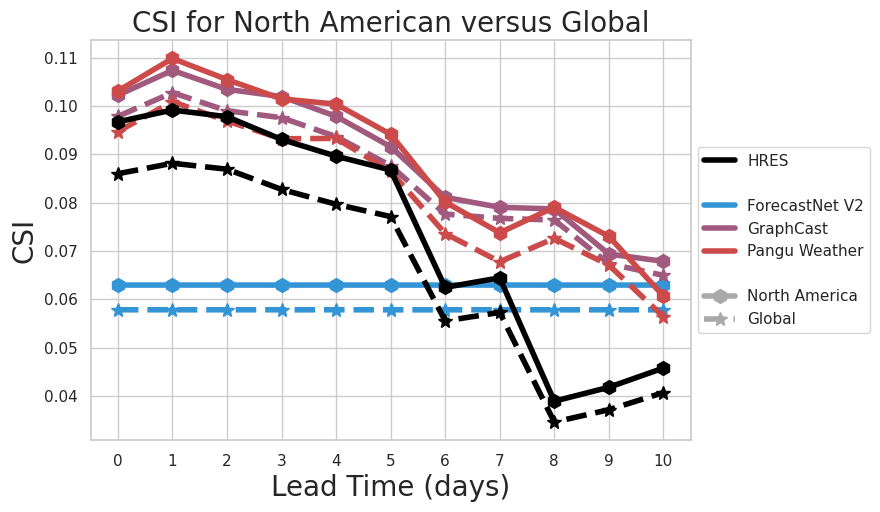

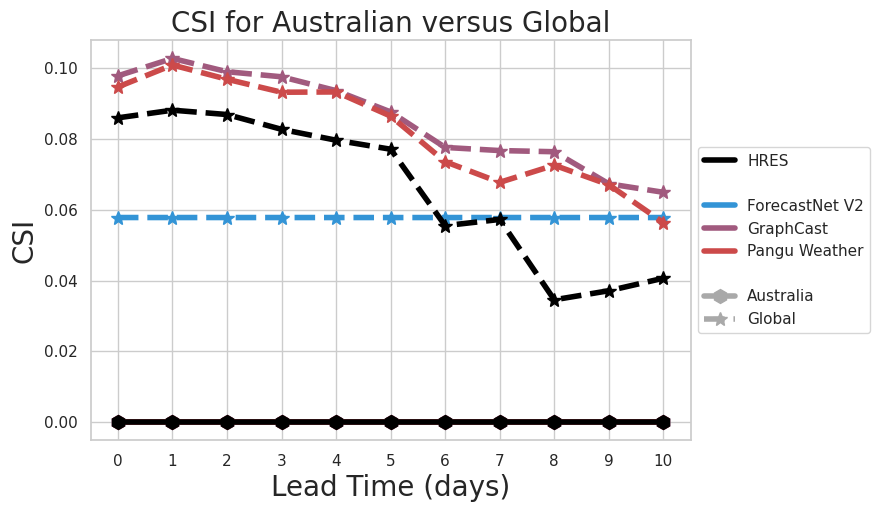

In [22]:
# create a group style for the local/global plots
na_group_style = {'linestyle':'-', 'marker':'h', 'group':'North America'}
au_group_style = {'linestyle':'-', 'marker':'h', 'group':'Australia'}

# plot the results for one metric for the three AI models versus HRES
na_fourv2_gfs_settings = fourv2_gfs_cira_settings | fourv2_style | na_group_style
na_gc_gfs_settings = gc_gfs_cira_settings | gc_style | na_group_style
na_pangu_gfs_settings = pangu_gfs_cira_settings | pangu_style | na_group_style
na_hres_settings = hres_ifs_settings | hres_style | na_group_style

au_fourv2_gfs_settings = fourv2_gfs_cira_settings | fourv2_style | au_group_style
au_gc_gfs_settings = gc_gfs_cira_settings | gc_style | au_group_style
au_pangu_gfs_settings = pangu_gfs_cira_settings | pangu_style | au_group_style
au_hres_settings = hres_ifs_settings | hres_style | au_group_style

# subset the data for the plots
na_fourv2_severe_plot_csi = pp.subset_results_to_xarray(results_df=fourv2_severe_results, 
    forecast_source=fourv2_gfs_cira_settings['forecast_source'], 
    target_source='practically_perfect_hindcast', metric='CriticalSuccessIndex', init_time='zeroz',
    case_id_list=na_case_ids)
na_gc_severe_plot_csi = pp.subset_results_to_xarray(results_df=gc_severe_results, 
    forecast_source=gc_gfs_cira_settings['forecast_source'], 
    target_source='practically_perfect_hindcast', metric='CriticalSuccessIndex', init_time='zeroz',
    case_id_list=na_case_ids)
na_pangu_severe_plot_csi  = pp.subset_results_to_xarray(results_df=pang_severe_results, 
    forecast_source=pangu_gfs_cira_settings['forecast_source'], 
    target_source='practically_perfect_hindcast', metric='CriticalSuccessIndex', init_time='zeroz',
    case_id_list=na_case_ids)
na_hres_severe_plot_csi = pp.subset_results_to_xarray(results_df=hres_severe_results, 
    forecast_source=hres_ifs_settings['forecast_source'], 
    target_source='practically_perfect_hindcast', metric='CriticalSuccessIndex', init_time='zeroz',
    case_id_list=na_case_ids)

# subset the data for the plots
au_fourv2_severe_plot_csi = pp.subset_results_to_xarray(results_df=fourv2_severe_results, 
    forecast_source=fourv2_gfs_cira_settings['forecast_source'], 
    target_source='practically_perfect_hindcast', metric='CriticalSuccessIndex', init_time='zeroz',
    case_id_list=au_case_ids)
au_gc_severe_plot_csi = pp.subset_results_to_xarray(results_df=gc_severe_results, 
    forecast_source=gc_gfs_cira_settings['forecast_source'], 
    target_source='practically_perfect_hindcast', metric='CriticalSuccessIndex', init_time='zeroz',
    case_id_list=au_case_ids)
au_pangu_severe_plot_csi  = pp.subset_results_to_xarray(results_df=pang_severe_results, 
    forecast_source=pangu_gfs_cira_settings['forecast_source'], 
    target_source='practically_perfect_hindcast', metric='CriticalSuccessIndex', init_time='zeroz',
    case_id_list=au_case_ids)
au_hres_severe_plot_csi = pp.subset_results_to_xarray(results_df=hres_severe_results, 
    forecast_source=hres_ifs_settings['forecast_source'], 
    target_source='practically_perfect_hindcast', metric='CriticalSuccessIndex', init_time='zeroz',
    case_id_list=au_case_ids)

# make a global settings so we can compare
fourv2_global_settings = fourv2_gfs_cira_settings | fourv2_style | global_group_style
pangu_global_settings = pangu_gfs_cira_settings | pangu_style | global_group_style
gc_global_settings = gc_gfs_cira_settings | gc_style | global_group_style
hres_global_settings = hres_ifs_settings | hres_style | global_group_style 

# plot the results
na_data = [na_fourv2_severe_plot_csi, fourv2_severe_plot_csi, na_gc_severe_plot_csi, 
    gc_severe_plot_csi, na_pangu_severe_plot_csi, pangu_severe_plot_csi, na_hres_severe_plot_csi, hres_severe_plot_csi]
settings = [na_fourv2_gfs_settings, fourv2_global_settings, na_gc_gfs_settings, gc_global_settings, 
    na_pangu_gfs_settings, pangu_global_settings, na_hres_settings, hres_global_settings]
pp.plot_results_by_metric(data=na_data, settings=settings, 
    title='CSI for North American versus Global', y_label='CSI')

au_data = [au_fourv2_severe_plot_csi, fourv2_severe_plot_csi, au_gc_severe_plot_csi, gc_severe_plot_csi, 
    au_pangu_severe_plot_csi, pangu_severe_plot_csi, au_hres_severe_plot_csi, hres_severe_plot_csi]
settings = [au_fourv2_gfs_settings, fourv2_global_settings, au_gc_gfs_settings, gc_global_settings, 
    au_pangu_gfs_settings, pangu_global_settings, au_hres_settings, hres_global_settings]
pp.plot_results_by_metric(data=au_data, settings=settings, 
    title='CSI for Australian versus Global', y_label='CSI')


In [23]:
au_hres_severe_plot_csi["value"]

<xarray.DataArray 'value' (lead_time: 11, case_id_number: 15)> Size: 1kB
array([[nan, 0.0, nan, nan, nan, nan, 0.0, 0.0, nan, 0.0, nan, 0.0, nan,
        nan, nan],
       [nan, 0.0, nan, nan, nan, nan, 0.0, 0.0, nan, 0.0, nan, 0.0, nan,
        nan, nan],
       [nan, 0.0, nan, nan, nan, nan, 0.0, 0.0, nan, 0.0, nan, 0.0, nan,
        nan, nan],
       [nan, 0.0, nan, nan, nan, nan, 0.0, 0.0, nan, 0.0, nan, 0.0, nan,
        nan, nan],
       [nan, 0.0, nan, nan, nan, nan, 0.0, 0.0, nan, 0.0, nan, 0.0, nan,
        nan, nan],
       [nan, 0.0, nan, nan, nan, nan, 0.0, 0.0, nan, 0.0, nan, 0.0, nan,
        nan, nan],
       [nan, 0.0, nan, nan, nan, nan, 0.0, 0.0, nan, 0.0, nan, 0.0, nan,
        nan, nan],
       [nan, 0.0, nan, nan, nan, nan, 0.0, 0.0, nan, 0.0, nan, 0.0, nan,
        nan, nan],
       [nan, 0.0, nan, nan, nan, nan, 0.0, 0.0, nan, 0.0, nan, 0.0, nan,
        nan, nan],
       [nan, 0.0, nan, nan, nan, nan, 0.0, 0.0, nan, 0.0, nan, 0.0, nan,
        nan, nan],
       [nan, 0.0, nan, nan, nan, nan, 0.0, 0.0, nan, 0.0, nan, 0.0, nan,
        nan, nan]], dtype=object)
Coordinates:
  * lead_time       (lead_time) timedelta64[ns] 88B 0 days 1 days ... 10 days
  * case_id_number  (case_id_number) int64 120B 259 260 261 262 ... 271 272 273

In [46]:
na_gc_severe_plot_csi["value"].mean("case_id_number")

<xarray.DataArray 'value' (lead_time: 11)> Size: 88B
array([0.10224226, 0.10737742, 0.1034551 , 0.1019574 , 0.09786627,
       0.091581  , 0.0810962 , 0.07902858, 0.07868728, 0.06934938,
       0.06784806])
Coordinates:
  * lead_time  (lead_time) timedelta64[ns] 88B 0 days 1 days ... 9 days 10 days

In [47]:
gc_severe_plot_csi["value"].mean("case_id_number")

<xarray.DataArray 'value' (lead_time: 11)> Size: 88B
array([0.09786045, 0.10277553, 0.09902131, 0.0975878 , 0.093672  ,
       0.0876561 , 0.07762065, 0.07673789, 0.07640649, 0.06733925,
       0.06494029])
Coordinates:
  * lead_time  (lead_time) timedelta64[ns] 88B 0 days 1 days ... 9 days 10 days

In [48]:
au_gc_severe_plot_csi

<xarray.Dataset> Size: 7kB
Dimensions:          (lead_time: 11, case_id_number: 11)
Coordinates:
  * lead_time        (lead_time) timedelta64[ns] 88B 0 days 1 days ... 10 days
  * case_id_number   (case_id_number) int64 88B 271 272 273 274 ... 279 280 281
Data variables:
    value            (lead_time, case_id_number) object 968B nan nan ... 0.0 nan
    init_time        (lead_time, case_id_number) object 968B nan nan ... nan nan
    target_variable  (lead_time, case_id_number) object 968B 'practically_per...
    metric           (lead_time, case_id_number) object 968B 'CriticalSuccess...
    forecast_source  (lead_time, case_id_number) object 968B 'CIRA GC GFS' .....
    target_source    (lead_time, case_id_number) object 968B 'practically_per...
    event_type       (lead_time, case_id_number) object 968B 'severe_convecti...

In [56]:
au_only = hres_severe_results[hres_severe_results["case_id_number"].isin(au_case_ids)]


In [59]:
na_only = hres_severe_results[hres_severe_results["case_id_number"].isin(na_case_ids)]


In [58]:
au_only["value"].value_counts()

value
1.0    406
0.0    246
Name: count, dtype: int64

In [60]:
na_only["value"].value_counts()

value
1.000000    1918
0.000000     579
0.062500      49
0.090909      33
0.019499      28
            ... 
0.002409       1
0.001454       1
0.002000       1
0.002318       1
0.000091       1
Name: count, Length: 4377, dtype: int64

In [ ]:
# plot the results for the australian cases
au_fourv2_ifs_settings = fourv2_ifs_cira_settings | fourv2_style | au_group_style
au_gc_ifs_settings = gc_ifs_cira_settings | gc_style | au_group_style
au_pangu_ifs_settings = pangu_ifs_cira_settings | pangu_style | au_group_style
au_hres_settings = hres_ifs_settings | hres_style | au_group_style

# subset the data for the plots
au_fourv2_ifs_plot = subset_results_to_xarray(results_df=fourv2_results, forecast_source=fourv2_ifs_settings['forecast_source'], 
                                                     target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=au_case_ids)
au_gc_ifs_plot = subset_results_to_xarray(results_df=gc_results, forecast_source=gc_ifs_settings['forecast_source'], 
                                                 target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=au_case_ids)
au_pangu_ifs_plot = subset_results_to_xarray(results_df=pang_results, forecast_source=pangu_ifs_settings['forecast_source'],
                                           target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=au_case_ids)
au_hres_plot = subset_results_to_xarray(results_df=hres_results, forecast_source=hres_settings['forecast_source'], 
                                    target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=au_case_ids)

# plot the results
data = [au_fourv2_ifs_plot, fourv2_ifs_plot, au_gc_ifs_plot, gc_ifs_plot, au_pangu_ifs_plot, pangu_ifs_plot, au_hres_plot, hres_plot]
settings = [au_fourv2_ifs_settings, fourv2_ifs_global_settings, au_gc_ifs_settings, gc_ifs_global_settings, 
    au_pangu_ifs_settings, pangu_ifs_global_settings, au_hres_settings, hres_settings_global]
cp.plot_results_by_metric(data=data, settings=settings, title='RMSE for Australian versus Global Heat Waves (IFS initialization)')



# dive into one example in depth

In [ ]:
# for this example, we dive into case id 3
my_case = ewb_cases.select_cases('case_id_number',3)[0]

cp.plot_all_cases(my_case, event_type='heat_wave', bounding_box=na_bounding_box, fill_boxes=True)

# make a style for the case id 3
my_group_style = {'linestyle':'-', 'marker':'h', 'group':'Case ID 3'}

# make the settings for the plots
my_fourv2_ifs_settings = fourv2_ifs_cira_settings | fourv2_style | my_group_style
my_gc_ifs_settings = gc_ifs_cira_settings | gc_style | my_group_style
my_pangu_ifs_settings = pangu_ifs_cira_settings | pangu_style | my_group_style
my_hres_settings = hres_ifs_settings | hres_style | my_group_style

# subset the data for the plots
my_fourv2_ifs_plot = subset_results_to_xarray(results_df=fourv2_results, forecast_source=fourv2_ifs_settings['forecast_source'], 
                                                     target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=[my_case.case_id_number])
my_gc_ifs_plot = subset_results_to_xarray(results_df=gc_results, forecast_source=gc_ifs_settings['forecast_source'], 
                                                 target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=[my_case.case_id_number])
my_pangu_ifs_plot = subset_results_to_xarray(results_df=pang_results, forecast_source=pangu_ifs_settings['forecast_source'],
                                           target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=[my_case.case_id_number])
my_hres_plot = subset_results_to_xarray(results_df=hres_results, forecast_source=hres_settings['forecast_source'], 
                                    target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=[my_case.case_id_number])

# plot the results
data = [my_fourv2_ifs_plot, fourv2_ifs_plot, my_gc_ifs_plot, gc_ifs_plot, my_pangu_ifs_plot, pangu_ifs_plot, my_hres_plot, hres_plot]    
settings = [my_fourv2_ifs_settings, fourv2_ifs_settings | global_group_style, my_gc_ifs_settings, 
    gc_ifs_settings | global_group_style, my_pangu_ifs_settings, pangu_ifs_settings | global_group_style, my_hres_settings, 
    hres_settings | global_group_style]
cp.plot_results_by_metric(data=data, settings=settings, title='RMSE Case ID 3')

# and make one more plot for the maximum temperature mae (same settings, just different data to plot)
my_fourv2_ifs_plot2 = subset_results_to_xarray(results_df=fourv2_results, forecast_source=fourv2_ifs_settings['forecast_source'], 
                                                     target_source='GHCN', metric='maximum_mae', init_time='zeroz', case_id_list=[my_case.case_id_number])
my_gc_ifs_plot2 = subset_results_to_xarray(results_df=gc_results, forecast_source=gc_ifs_settings['forecast_source'], 
                                                 target_source='GHCN', metric='maximum_mae', init_time='zeroz', case_id_list=[my_case.case_id_number])
my_pangu_ifs_plot2 = subset_results_to_xarray(results_df=pang_results, forecast_source=pangu_ifs_settings['forecast_source'],
                                           target_source='GHCN', metric='maximum_mae', init_time='zeroz', case_id_list=[my_case.case_id_number])
my_hres_plot2 = subset_results_to_xarray(results_df=hres_results, forecast_source=hres_settings['forecast_source'], 
                                    target_source='GHCN', metric='maximum_mae', init_time='zeroz', case_id_list=[my_case.case_id_number])

data = [my_fourv2_ifs_plot2, my_gc_ifs_plot2, my_pangu_ifs_plot2, my_hres_plot2, hres_plot]    
settings = [my_fourv2_ifs_settings, my_gc_ifs_settings, my_pangu_ifs_settings, my_hres_settings, hres_settings_global]
cp.plot_results_by_metric(data=data, settings=settings, title='Maximum Temperature MAE Case ID 3')


In [ ]:
# show the individual data for this case
era5 = defaults.era5_heatwave_target.open_and_maybe_preprocess_data_from_source()
temp_climatology_ds = xr.open_zarr('gs://extremeweatherbench/datasets/surface_air_temperature_1990_2019_climatology.zarr/')
temp_climatology_ds = temp_climatology_ds.sel(quantile=0.85)
# load in all of the events in the yaml file
heatwave_dataset = cp.generate_heatwave_dataset(era5, temp_climatology_ds, my_case)
cp.generate_heatwave_plots(heatwave_dataset, my_case)